In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r"C:\Users\Aditya\Downloads\census_income.csv")

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
#no null values present

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#some features are in object dtype we have to treat them

In [9]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#observation:-
#1)no null values 
#2)difference between 75% and max are too much it means may be that features are have skewed data
#3)capital_loss and capital_gain has more no of zeros it may happen so we cannot replace it by any other values


# univariate analysis

no of categories in Workclass is 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


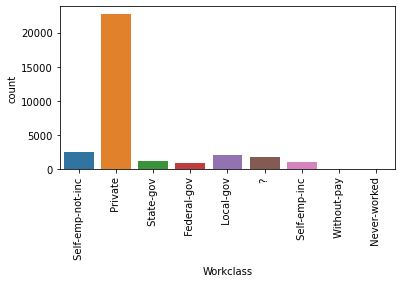

In [11]:
print('no of categories in Workclass is \n',data['Workclass'].value_counts())
plt.figure(figsize=(6,3))
sns.countplot(data['Workclass'])
plt.xticks(rotation=90)
plt.show()

In [12]:
#most of the employees belongs to private and  Without-pay,Never-worked are least numbers 

In [7]:
#here workclass contains special character '?' we can replace it by mode (most frequently occuring)
data['Workclass']=data['Workclass'].str.replace('?','Private')

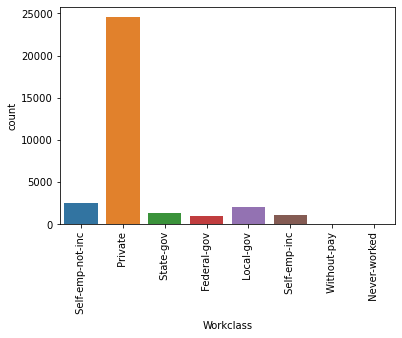

In [14]:
sns.countplot(data['Workclass'])
plt.xticks(rotation=90)
plt.show()

no of categories in Workclass is 
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


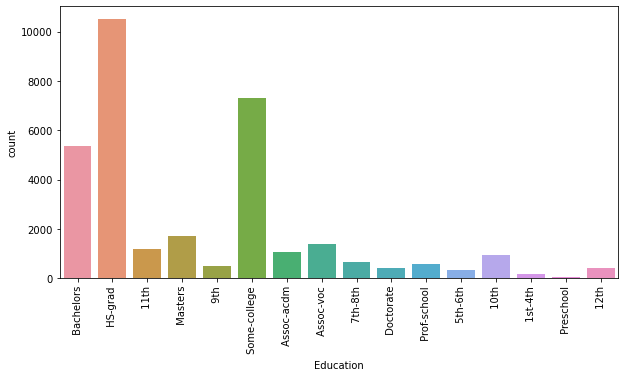

In [15]:
print('no of categories in Workclass is \n',data['Education'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(data['Education'])
plt.xticks(rotation=90)
plt.show()

In [16]:
#observation:-
#===> HS-grad is occuring most of the time i,e their is education background of HS-grad  persons are more and least is preschool

<AxesSubplot:xlabel='Education_num', ylabel='count'>

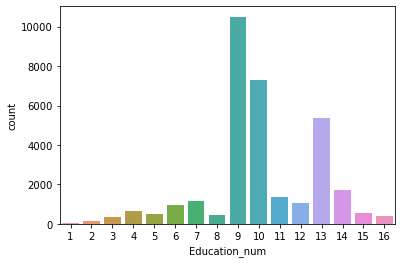

In [17]:
sns.countplot(data['Education_num'])

In [18]:
#already we seen in the education same thing is happens in the education_num also

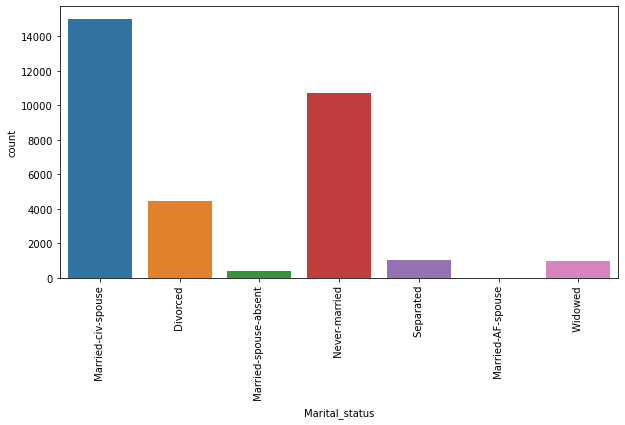

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data['Marital_status'])
plt.xticks(rotation=90)
plt.show()

In [20]:
#in the marital-status married-civ-spouse is having highest count and least one is married-AF-spouse

no of categories present in occupation is 
  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


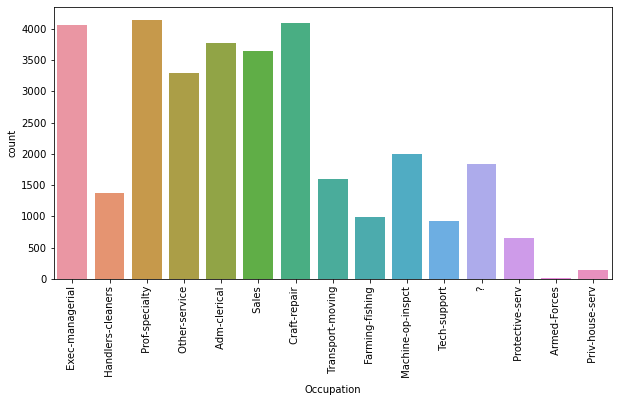

In [21]:
print('no of categories present in occupation is \n',data['Occupation'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)
plt.show()

In [22]:
#in the occupation most of the people are pof-specialty 

In [6]:
#there is missing data 1843 rows we can replace it by mode(i,e  Prof-specialty is occuring more no of times)
data['Occupation']=data['Occupation'].str.replace('?','Prof-specialty')

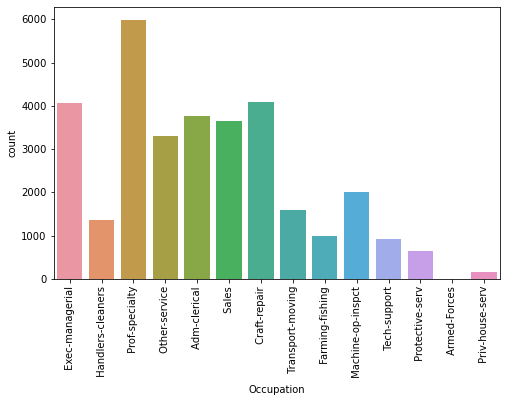

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)
plt.show()

no of categories present in Relationship is 
  Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


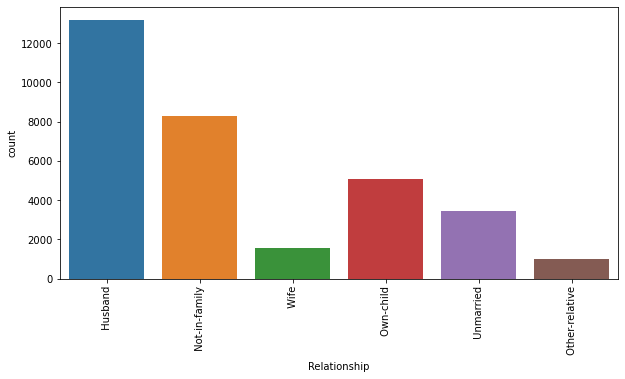

In [25]:
print('no of categories present in Relationship is \n',data['Relationship'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(data['Relationship'])
plt.xticks(rotation=90)
plt.show()

In [26]:
#observation:-
#most of the employees are husbands
#less are other relative

no of categories present in Race is 
  White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


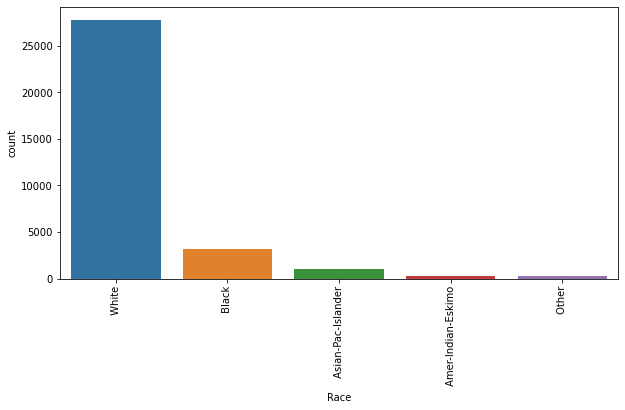

In [27]:
print('no of categories present in Race is \n',data['Race'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(data['Race'])
plt.xticks(rotation=90)
plt.show()

In [28]:
#observation:-
#most of the employees are belongs to race white and less are other

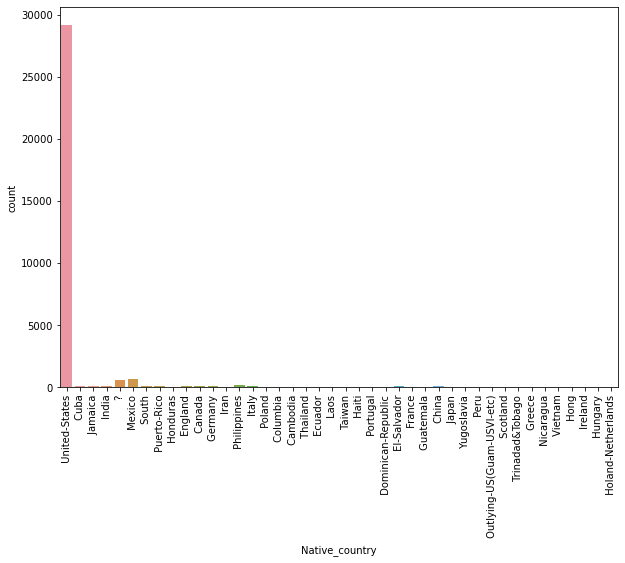

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(data['Native_country'])
plt.xticks(size=10,rotation=90)
plt.show()

In [30]:
#observation:-
#most of employes native country is united states and least one is Holand-Netherlands 

In [8]:
#in the country's there is missing data with '?' we have to fill this data by mode
data['Native_country']=data['Native_country'].str.replace('?','United-States')

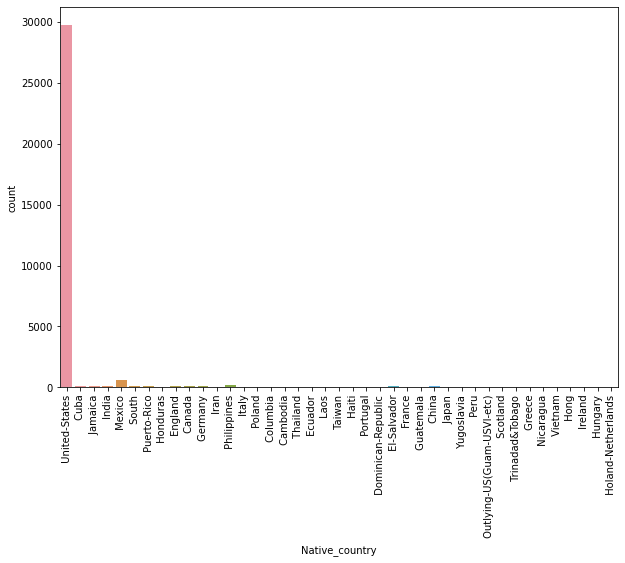

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(data['Native_country'])
plt.xticks(size=10,rotation=90)
plt.show()

no of categories present in Sex is 
  Male      21789
 Female    10771
Name: Sex, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

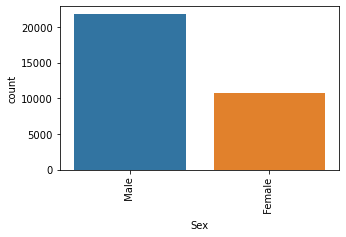

In [33]:
print('no of categories present in Sex is \n',data['Sex'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(data['Sex'])
plt.xticks(rotation=90)
plt.show

In [34]:
#observation:-
#male are higher than feamale count so most of the employees are male 

no of categories present in Income is 
  <=50K    24719
 >50K      7841
Name: Income, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

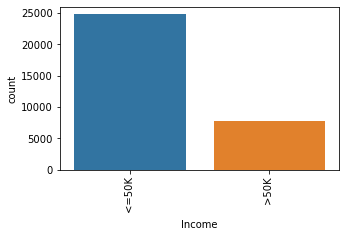

In [9]:
print('no of categories present in Income is \n',data['Income'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(data['Income'])
plt.xticks(rotation=90)
plt.show

In [36]:
#observation:-
#income is our target variable and it looks like an imbalanced,we have to balance this

# bi-variate analysis

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

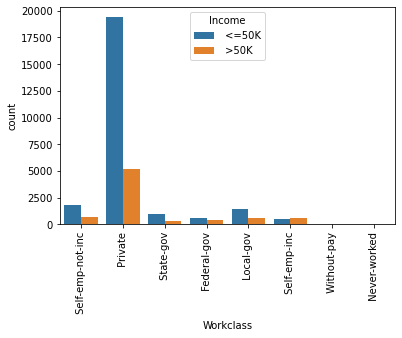

In [37]:
sns.countplot(data['Workclass'],hue='Income',data=data)
plt.xticks(rotation=90)

In [38]:
#observation:-
#most of the private emloyees income is <=50k 
#in self_employee_inc more than 50k is high and <=50k is low 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

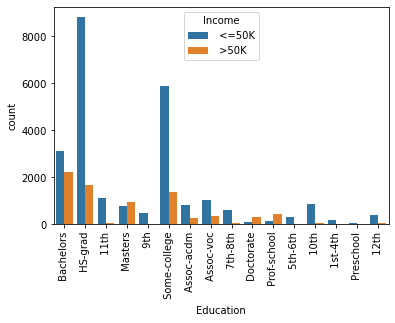

In [39]:
sns.countplot(data['Education'],hue='Income',data=data)
plt.xticks(rotation=90)

In [40]:
#observation:-
#in the total no of bachelors more no of people income is <=50k and also more than half of the bachelors from total bachelors income is >50k
#we observe that HS-grade has high number but most of the HS-grad income is <=50k and remaining categories are also same
#we can see that there is more no of people from total no of people in Doctorate and prof-school income is >50k

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

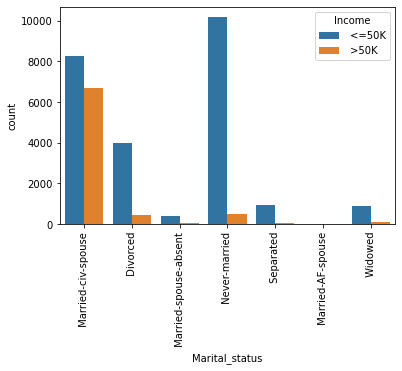

In [41]:
sns.countplot(data['Marital_status'],hue='Income',data=data)
plt.xticks(rotation=90)

In [42]:
#obseravation:-
#more than half of the people in married-civ-spouse income is >50k comparing to other categories

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

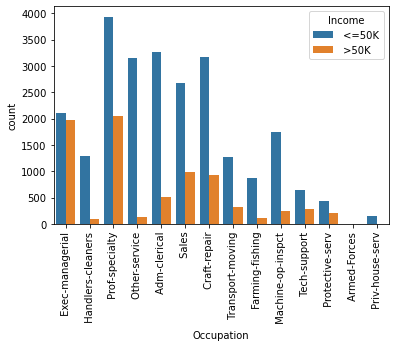

In [43]:
sns.countplot(data['Occupation'],hue='Income',data=data)
plt.xticks(rotation=90)

In [44]:
#observation:-
#almost Exec-managerial income is >50k
#and also prof-speciality also more than 50% count income is >50k and remaining all are having high count with <=50k and >50k is less count

In [45]:
data.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

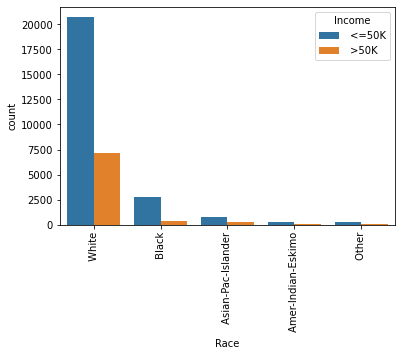

In [46]:
sns.countplot(data['Race'],hue='Income',data=data)
plt.xticks(rotation=90)

In [47]:
#obervation:-
#<=50k is more in white 

# multivariate analysis

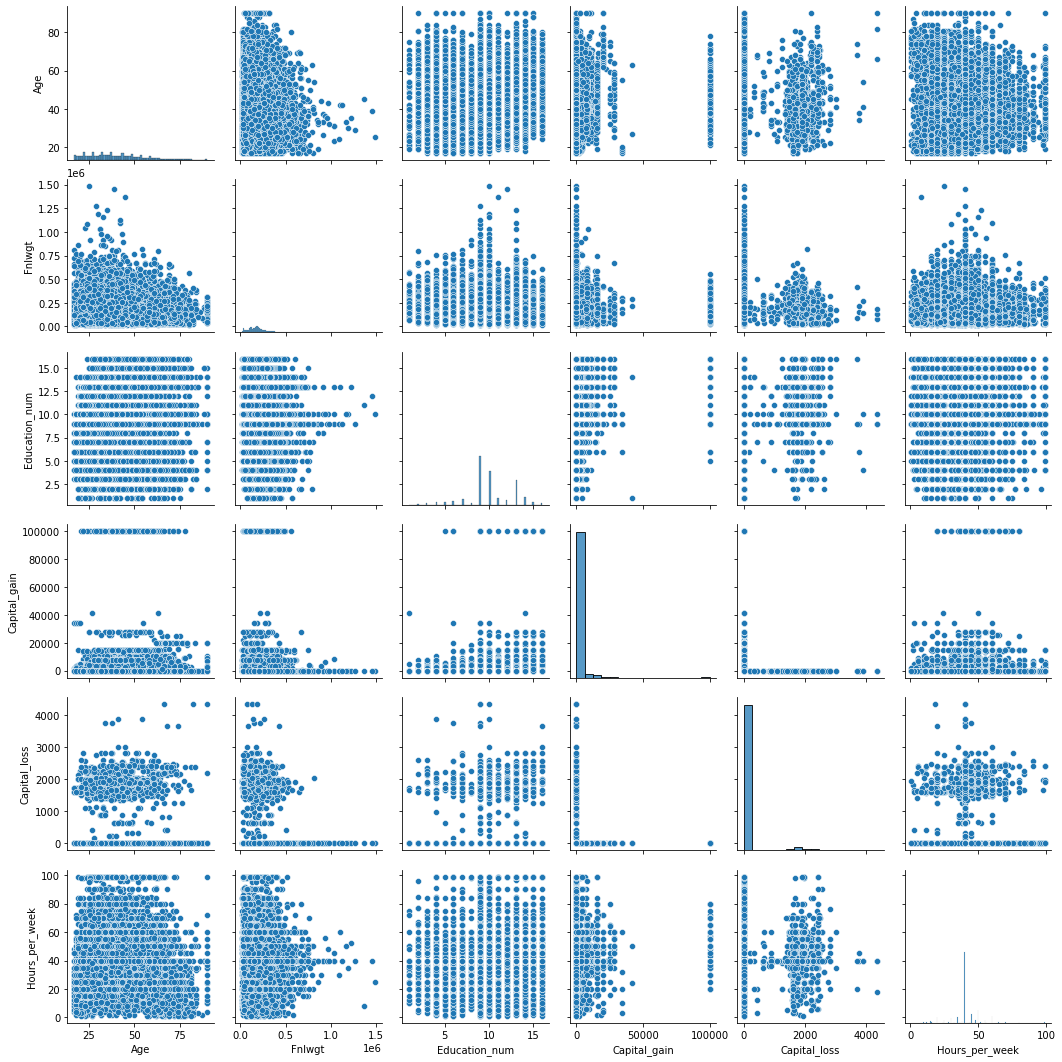

In [42]:
sns.pairplot(data)

# treating skewness and outliers

In [10]:
data.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [11]:
continous=data[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]

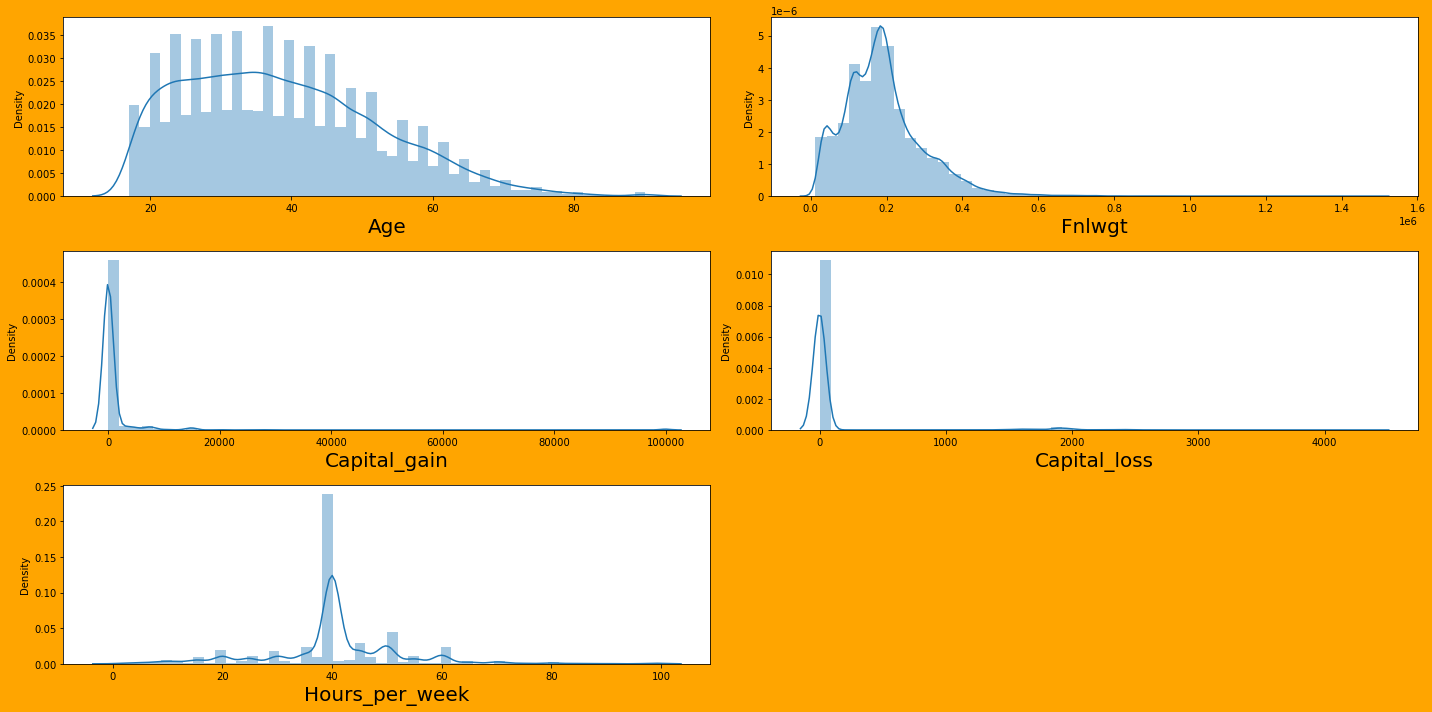

In [50]:
plt.figure(figsize=(20,10),facecolor='orange')
plotnumber=1
for column in continous:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber) #since 9 features 
        sns.distplot(continous[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

In [ ]:
#observation:-
#there is skewed data present in age,Fnlwgt,capital_gain,capital_loss and hours_per_week
#data is right skewed 

In [12]:
continous.skew() # we'll treat it later

Age                0.558738
Fnlwgt             1.446972
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [52]:
#there is highly right skewed data in continous features 


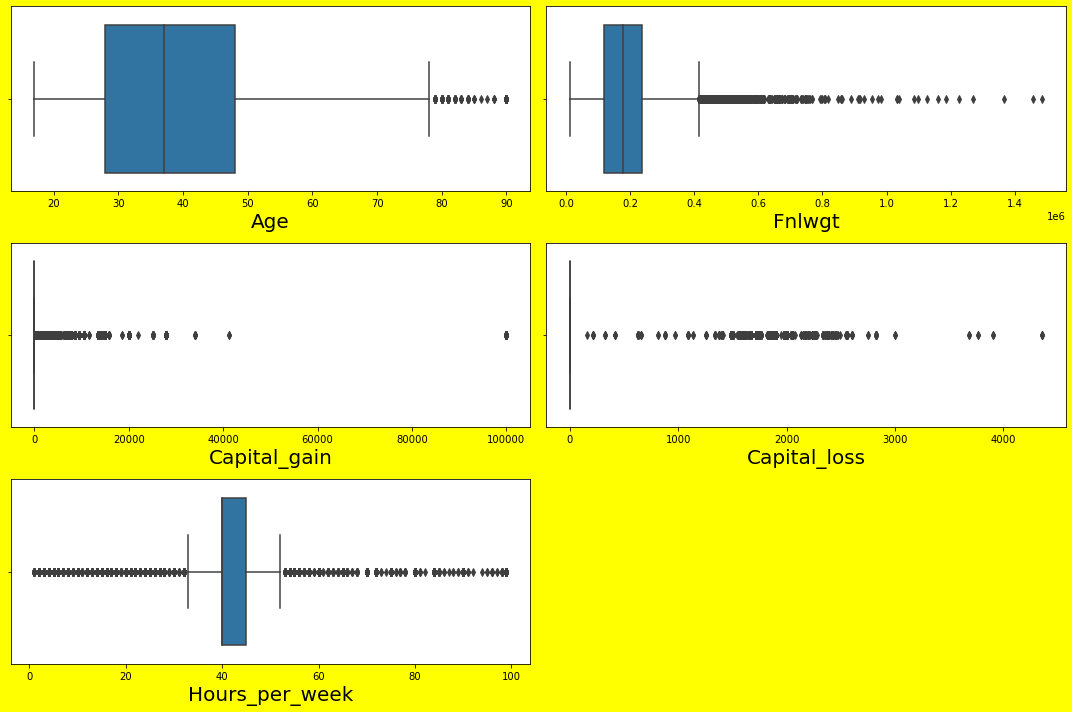

In [53]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in continous:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber) #since 9 features 
        sns.boxplot(continous[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

In [54]:
from scipy.stats import zscore
z_score=zscore(continous)
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df1=continous[filtering_entry]

In [50]:
data.shape,df1.shape

((32560, 15), (30028, 5))

In [51]:
data_loss=((32560-30028)/32560)*100
data_loss

7.776412776412776

In [52]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [53]:
#we can obseve that our target variable is already imbalenced and if we remove the outliers (2532), it leads to our model is biased so it is better to keep the outliers data 

In [13]:
data.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [14]:
#we have adjust the skewed data in each feature so log transformation is not working well because capital_gain and capital_loss are having 0 value so we can use square root or cube root transformation beause data is highly right skewed 
data[['Age','Fnlwgt']]=np.sqrt(data[['Age','Fnlwgt']])

data['Capital_gain']=np.cbrt(data['Capital_gain'])#since highly skewed data 

data['Capital_loss']=np.sqrt(data['Capital_loss']) 

In [15]:
data.skew()

Age               0.204335
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      4.100150
Capital_loss      4.376279
Hours_per_week    0.227636
dtype: float64

In [16]:
#skewness is drastically decreased from capital_gain we cannot decrease it by using other techniques so we move furthur steps

# Encoding categorical data 

In [13]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [17]:
#we can observe that Eduction and Education number both are same we can clearly see that Education number indicates the level of education so we don't need encode 'Education' feature and also we can drop it as well 
data.drop('Education',axis=1,inplace=True)

In [15]:
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,Self-emp-not-inc,288.636450,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
1,6.164414,Private,464.377002,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
2,7.280110,Private,484.480134,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
3,5.291503,Private,581.729318,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
4,6.082763,Private,533.462276,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K


In [25]:
data.shape

(32560, 14)

In [18]:
#iam using binary encoder technique for feures which are having more than 10 categories and also iam using get_dummies for features which are hiaving less than 10 categories
data1=pd.get_dummies(data[['Workclass','Marital_status','Relationship','Race','Sex']],drop_first=True)

In [19]:
data1

,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
32556,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [20]:
from category_encoders import BinaryEncoder
bi_ec=BinaryEncoder()
data2=bi_ec.fit_transform(data[['Occupation','Native_country']])

In [21]:
data2

,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
32555,1,0,1,1,0,0,0,0,0,1
32556,1,0,1,0,0,0,0,0,0,1
32557,0,1,0,1,0,0,0,0,0,1
32558,0,1,0,1,0,0,0,0,0,1


In [26]:
df=pd.concat([data,data1,data2],axis=1)
df.head(2)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,7.071068,Self-emp-not-inc,288.636450,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,...,0,0,0,1,0,0,0,0,0,1
1,6.164414,Private,464.377002,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
#remove duplicate columns
df.drop(['Workclass','Marital_status','Relationship','Race','Sex','Occupation','Native_country'],axis=1,inplace=True)

In [28]:
df.shape

(32560, 40)

In [29]:
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,7.071068,288.636450,13,0.0,0.0,13,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,6.164414,464.377002,9,0.0,0.0,40,<=50K,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,7.280110,484.480134,7,0.0,0.0,40,<=50K,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,5.291503,581.729318,13,0.0,0.0,40,<=50K,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,6.082763,533.462276,14,0.0,0.0,40,<=50K,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    32560 non-null  float64
 1   Fnlwgt                                 32560 non-null  float64
 2   Education_num                          32560 non-null  int64  
 3   Capital_gain                           32560 non-null  float64
 4   Capital_loss                           32560 non-null  float64
 5   Hours_per_week                         32560 non-null  int64  
 6   Income                                 32560 non-null  object 
 7   Workclass_ Local-gov                   32560 non-null  uint8  
 8   Workclass_ Never-worked                32560 non-null  uint8  
 9   Workclass_ Private                     32560 non-null  uint8  
 10  Workclass_ Self-emp-inc                32560 non-null  uint8  
 11  Wo

In [31]:
#we can see that our target variable is in object dtype and income is having only two categories so i am converting >50k as '1' and <=50k as '0' by using label encoder
from sklearn.preprocessing import LabelEncoder
le_encdr=LabelEncoder()

df['Income']=le_encdr.fit_transform(df['Income'])

In [32]:
df.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,7.071068,288.636450,13,0.0,0.0,13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,6.164414,464.377002,9,0.0,0.0,40,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,7.280110,484.480134,7,0.0,0.0,40,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,5.291503,581.729318,13,0.0,0.0,40,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,6.082763,533.462276,14,0.0,0.0,40,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#data loss is less than 10% so it is in acceptable range

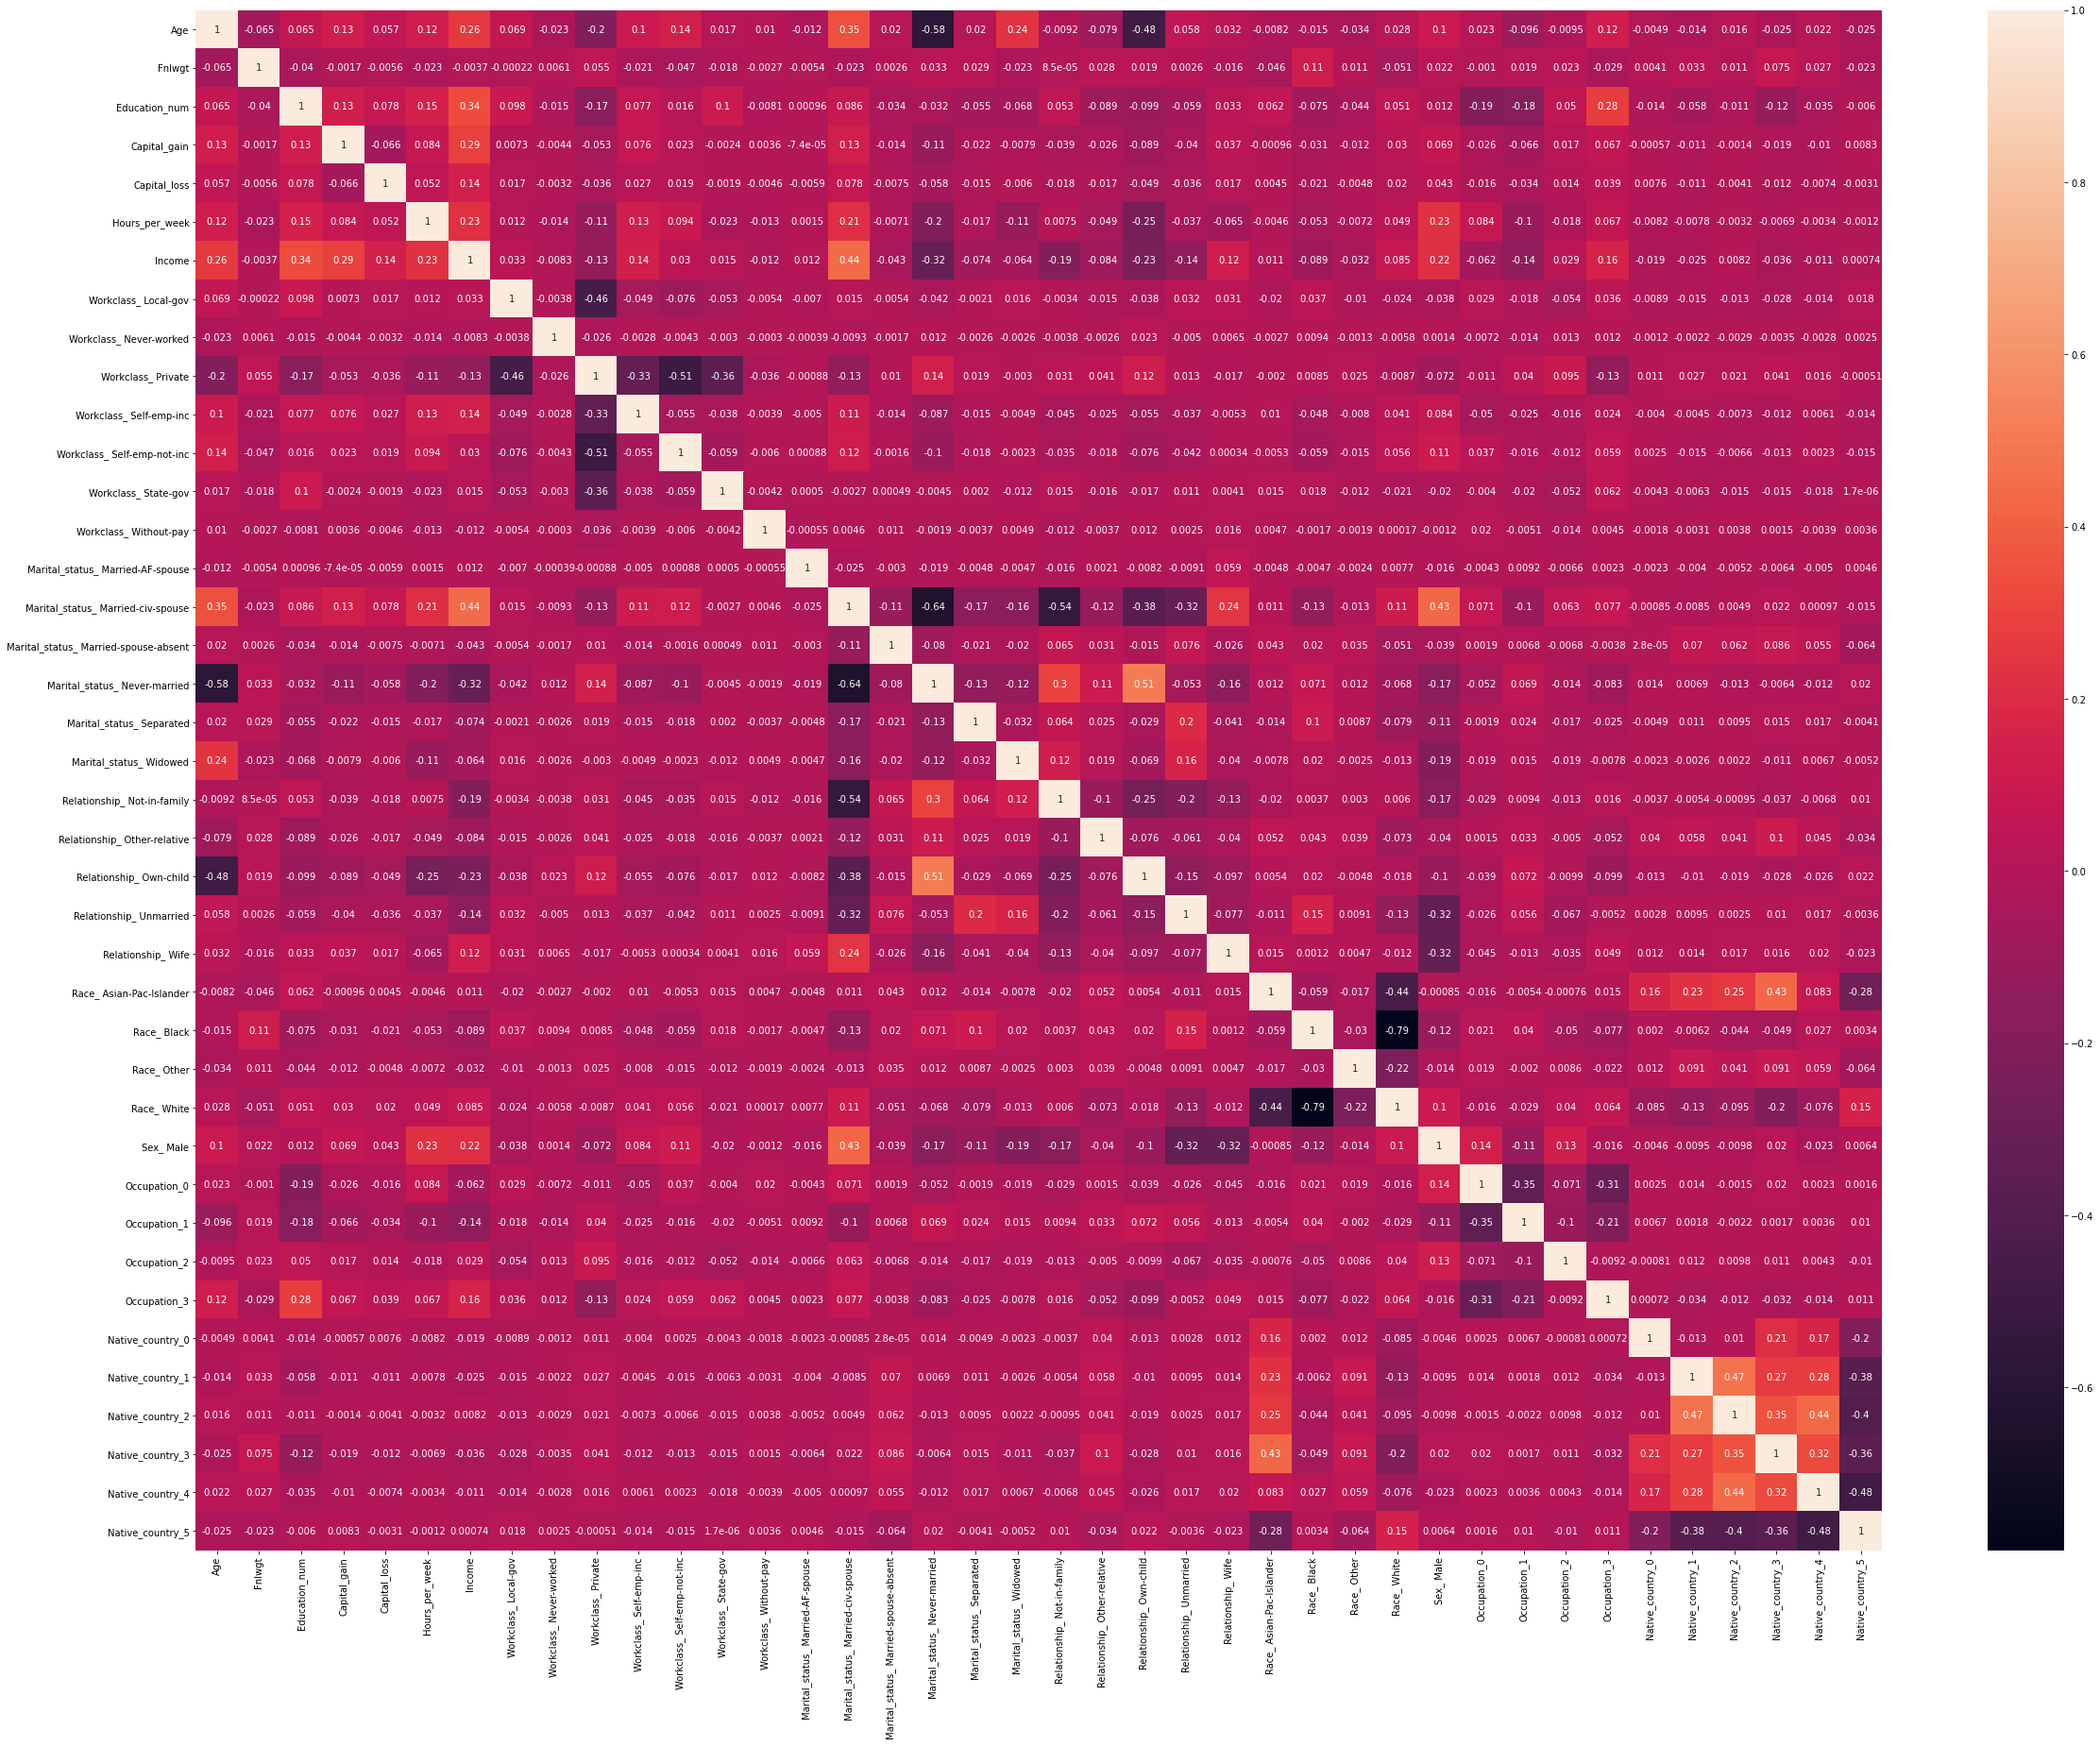

In [77]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#we can see that features are not correlated each other we can observe colours,features are not correlated with each other 

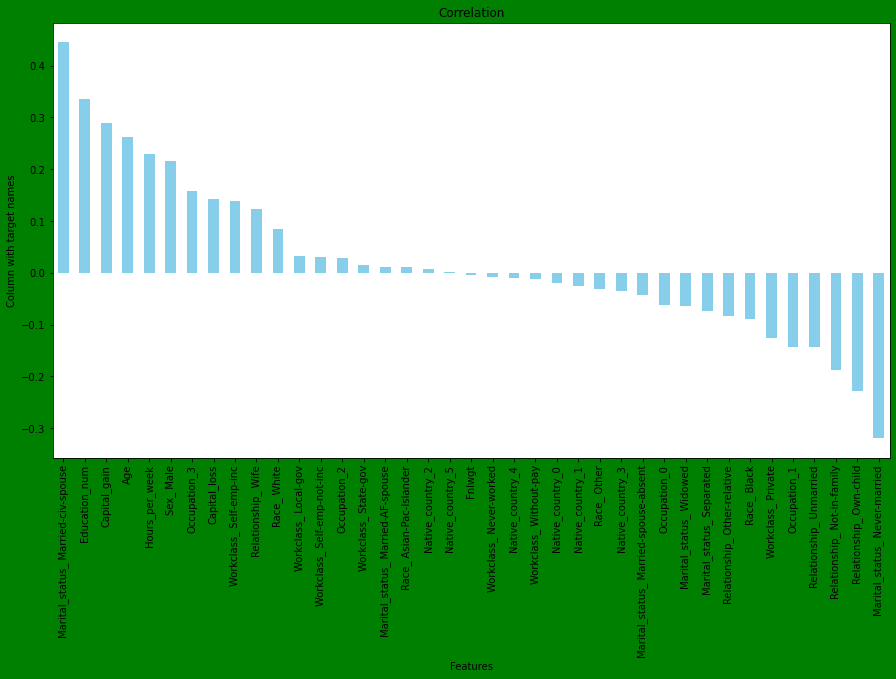

In [78]:
plt.figure(figsize =(15, 8),facecolor='green')
df.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()


In [ ]:
#Observation:-
#marital_status-married_civ_spouse is highly positively correlated with the target variable and next one is education_num 
#marital_status_never_married is highly -vely correlated with the target variable and next one relationship_own_child
#and least correlation with the target variable is native country-2

In [33]:
#splitting dat into independent and dependent
X=df.drop('Income',axis=1)
y=df['Income']

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [35]:
x

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Native_country_0,Native_country_1,Native_country_2,Native_country_3,Native_country_4,Native_country_5
0,0.549611,0.160519,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.380576,0.319180,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.588584,0.337330,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.217833,0.425128,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.365354,0.381552,0.866667,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.200056,0.357886,0.733333,0.000000,0.0,0.377551,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32556,0.410433,0.254654,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.651164,0.251812,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32558,0.105768,0.305186,0.533333,0.000000,0.0,0.193878,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
#checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_score"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["columns"]=x.columns
vif

,vif_score,columns
0,7.322917,Age
1,7.914230,Fnlwgt
2,16.633289,Education_num
3,1.146622,Capital_gain
4,1.072787,Capital_loss
5,13.034364,Hours_per_week
6,3.023975,Workclass_ Local-gov
7,1.008954,Workclass_ Never-worked
8,24.936493,Workclass_ Private
9,2.131550,Workclass_ Self-emp-inc


In [37]:
#in the vif data which is high in particular category that one has high vif score so iam not remove the feature which has high vif score i can use another technique PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x)

array([[-1.00906599e+00,  6.03432852e-01,  4.59608158e-01, ...,
        -3.04721071e-04, -5.80754233e-05,  1.66408248e-04],
       [ 1.73803456e-01,  2.91164923e-02, -7.36063501e-01, ...,
        -4.67430713e-03,  1.05342188e-03, -1.02361730e-03],
       [-6.01030847e-01, -5.48270120e-01, -4.65123628e-01, ...,
         2.71034680e-04,  7.27207578e-04, -8.24402250e-04],
       ...,
       [ 4.40002766e-01,  1.03551372e-01,  1.10724753e+00, ...,
         2.27813940e-03, -8.96473738e-04,  1.01468671e-03],
       [ 7.82683215e-01, -1.80285881e-01,  1.49995301e-01, ...,
        -1.38657762e-03, -1.16684973e-03, -8.56128421e-04],
       [-6.85106925e-01,  6.93245693e-01,  8.36411395e-01, ...,
        -4.43362381e-03, -2.22637503e-03, -9.82721492e-04]])

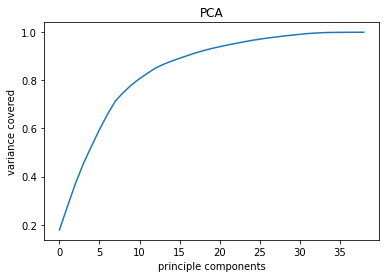

In [38]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principle components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [39]:
#i can select 28 components 
pca=PCA(n_components=28)
pcomponent=pca.fit_transform(x)
x_pca=pd.DataFrame(pcomponent,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28'])
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-1.009066,0.603433,0.459608,0.398508,-0.603121,-0.205218,0.181328,-0.081698,-0.006232,0.028965,...,-0.054387,-0.045907,0.021183,0.057305,0.006018,-0.021531,-0.017119,-0.023815,-0.172400,-0.266688
1,0.173803,0.029116,-0.736064,-0.021124,0.102056,0.857037,-0.224893,0.030247,0.126771,-0.070948,...,0.102863,0.104302,-0.000356,-0.207134,0.049942,-0.060977,0.076095,-0.021833,-0.017592,-0.015399
2,-0.601031,-0.548270,-0.465124,0.160458,0.772596,0.035233,0.655439,0.762698,-0.171417,-0.458645,...,0.137017,-0.123963,0.164619,0.010568,0.018458,-0.053204,0.096160,0.001436,-0.031535,0.018174
3,-0.374166,0.309023,0.125011,-0.114305,1.427476,-0.386345,0.627589,0.509011,-0.962630,0.159685,...,0.196075,0.297117,-0.660360,-0.008032,0.655416,-0.075142,-0.132845,0.136934,-0.058657,-0.031498
4,-0.466503,0.446736,0.528144,0.187568,0.597122,-0.514943,-0.613230,-0.288770,-0.732213,-0.146370,...,0.192337,0.401258,-0.172093,0.007354,-0.080578,0.012265,-0.052037,0.014042,-0.128616,0.023745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.594951,0.333347,-0.316899,0.129162,0.871488,-0.216189,-0.208435,-0.615047,-0.682360,-0.147000,...,0.180399,0.406930,-0.164282,-0.069428,-0.047571,0.044182,-0.121151,0.006900,-0.084218,-0.023216
32556,-0.810054,-0.524857,-0.912049,0.407429,0.270345,0.184863,-0.116848,-0.266740,-0.021243,-0.096890,...,-0.044376,-0.053281,0.032838,-0.003762,0.033431,-0.012700,-0.017683,-0.012675,-0.047650,-0.028382
32557,0.440003,0.103551,1.107248,-0.047243,0.626186,-0.132923,-0.425648,-0.373353,0.805065,0.087905,...,0.203896,0.168940,-0.017432,0.107284,0.012122,0.196181,-0.389222,0.020489,0.005940,0.100895
32558,0.782683,-0.180286,0.149995,-0.286626,-0.791823,-0.940907,-0.295355,0.234940,0.200278,-0.018836,...,0.108530,0.125002,0.006758,0.018505,0.020768,-0.002708,-0.019965,0.002292,-0.031173,-0.125114


In [40]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [41]:
#target variable variable is imbalanced so we have to balance it by using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_pca,y=sm.fit_resample(x_pca,y)

In [42]:
y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [43]:
x_pca.shape

(49438, 28)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
lr=LogisticRegression()

In [45]:
#finding best random state 
maxAccu=0
maxRS=0
for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    predx=lr.predict(x_test)
    acc=accuracy_score(y_test,predx)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('best accuracy is',maxAccu,'on random_state',maxRS)   

best accuracy is 0.8243527508090615 on random_state 30


In [46]:
#here the random state 198 is given best accuracy 
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=30)

In [47]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n==========train results============")
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:2f}%')
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n=========test reslts===========')
        print(f'accuracy score is:{accuracy_score(y_test,pred)*100:2f}%')
        print('\n')
        print(confusion_matrix(y_test,pred))
        print('\n')
        print(classification_report(y_test,pred))
        scr=cross_val_score(clf,x_pca,y,cv=10)
        print('cross validation score on lgistic regression is ',scr.mean())

In [103]:
# Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:81.128971%

=========test reslts===========
accuracy score is:82.362460%


[[4829 1305]
 [ 875 5351]]


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      6134
           1       0.80      0.86      0.83      6226

    accuracy                           0.82     12360
   macro avg       0.83      0.82      0.82     12360
weighted avg       0.83      0.82      0.82     12360

cross validation score on lgistic regression is  0.8139286122312159


In [104]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:89.055505%

=========test reslts===========
accuracy score is:84.749191%


[[4867 1267]
 [ 618 5608]]


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      6134
           1       0.82      0.90      0.86      6226

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360

cross validation score on lgistic regression is  0.8521991847842099


In [105]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dcfr=DecisionTreeClassifier()
dcfr.fit(x_train,y_train)
print_score(dcfr,x_train,x_test,y_train,y_test,train=True)
print_score(dcfr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:99.997303%

=========test reslts===========
accuracy score is:83.551780%


[[5054 1080]
 [ 953 5273]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      6134
           1       0.83      0.85      0.84      6226

    accuracy                           0.84     12360
   macro avg       0.84      0.84      0.84     12360
weighted avg       0.84      0.84      0.84     12360

cross validation score on lgistic regression is  0.8424495600983903


In [48]:
#random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()
rfclf.fit(x_train,y_train)
print_score(rfclf,x_train,x_test,y_train,y_test,train=True)
print_score(rfclf,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:99.994606%

=========test reslts===========
accuracy score is:88.786408%


[[5339  834]
 [ 552 5635]]


              precision    recall  f1-score   support

           0       0.91      0.86      0.89      6173
           1       0.87      0.91      0.89      6187

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.89     12360
weighted avg       0.89      0.89      0.89     12360

cross validation score on lgistic regression is  0.8895793314006208


In [107]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:83.739684%

=========test reslts===========
accuracy score is:83.600324%


[[4837 1297]
 [ 730 5496]]


              precision    recall  f1-score   support

           0       0.87      0.79      0.83      6134
           1       0.81      0.88      0.84      6226

    accuracy                           0.84     12360
   macro avg       0.84      0.84      0.84     12360
weighted avg       0.84      0.84      0.84     12360

cross validation score on lgistic regression is  0.8332257394491377


In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

gbdt.fit(x_train,y_train)
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:83.453800%

=========test reslts===========
accuracy score is:83.632686%


[[4922 1212]
 [ 811 5415]]


              precision    recall  f1-score   support

           0       0.86      0.80      0.83      6134
           1       0.82      0.87      0.84      6226

    accuracy                           0.84     12360
   macro avg       0.84      0.84      0.84     12360
weighted avg       0.84      0.84      0.84     12360

cross validation score on lgistic regression is  0.8297465336224545


In [109]:
#plotting ROC AUC curve 
from sklearn.metrics import plot_roc_curve,roc_auc_score


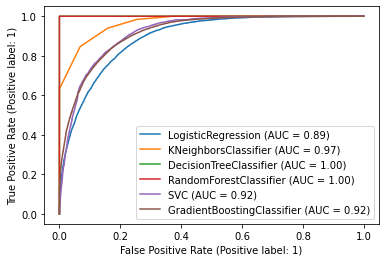

In [110]:
#how wel our model is works on training data 
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dcfr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfclf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

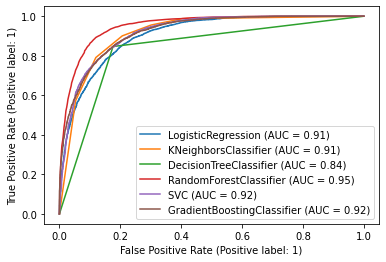

In [111]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dcfr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfclf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

# random forest classifier gives the best score so i can choose randomforest is final model


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
#hyper prameter tunning 
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
params={'criterion':['entropy','gini'],
            'n_estimators':[13,15],
            'max_depth' :[5,8],
            'min_samples_split':[5,10],
            'min_samples_leaf':[5,7],
            'max_features':['auto','sqrt','log2']
             }

In [50]:
Grdcv=GridSearchCV(RandomForestClassifier(),params,cv=10,scoring='accuracy')
Grdcv.fit(x_train,y_train)
Grdcv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 15}

In [57]:
rfc=RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=8, min_samples_leaf=5,min_samples_split=10,n_estimators=15)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)


In [58]:
rf_conf_mat

array([[4791, 1382],
       [ 701, 5486]], dtype=int64)

In [59]:
print('accuracy score \n',accuracy_score(y_test,y_pred))

accuracy score 
 0.8314724919093851


In [60]:
print(classification_report(y_test,y_pred))      

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      6173
           1       0.80      0.89      0.84      6187

    accuracy                           0.83     12360
   macro avg       0.84      0.83      0.83     12360
weighted avg       0.84      0.83      0.83     12360



In [ ]:
#by using hypeparameter tunning accuracy score is not increase 
#i gave a lower range so accuracy not increase, it may increase with high range 

In [61]:
#save the model
import pickle
filename='census_Income.pkl'
pickle.dump(rfc,open(filename,'wb'))

In [62]:
#conclusion
loaded_model= pickle.load(open('census_Income.pkl', 'rb'))
results=loaded_model.score(x_test,y_test)
print(results)

0.8314724919093851


In [65]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359
predicted,1,0,1,0,1,1,1,0,1,0,...,0,1,1,0,1,0,1,1,1,1
original,1,0,1,0,1,1,1,0,1,0,...,0,1,1,0,1,0,1,1,1,1
